In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [ ]:
ps_r = pd.read_excel('ps5_reviews.xlsx')
ps_s = pd.read_excel('ps5_stars.xlsx')

In [ ]:
ps = pd.concat([ps_r, ps_s], axis=1)

In [ ]:
ps.head()

,Reviews,Stars
0,I ordered this the day it released on Friday N...,5.0 out of 5 stars
1,"Took a pic on the side of my 55"" tv for size r...",5.0 out of 5 stars
2,I've waited 3 years for Spider-Man 2 game bund...,5.0 out of 5 stars
3,Open the box to find my ps5 that i paid 499 fo...,4.0 out of 5 stars
4,It was amazing. I was worried about my package...,5.0 out of 5 stars


In [ ]:
# add 'ID' column to give each review an ID

id = list(range(1, len(ps)+1))

ps.insert(0, "ID", id)
ps.head()

,ID,Reviews,Stars
0,1,I ordered this the day it released on Friday N...,5.0 out of 5 stars
1,2,"Took a pic on the side of my 55"" tv for size r...",5.0 out of 5 stars
2,3,I've waited 3 years for Spider-Man 2 game bund...,5.0 out of 5 stars
3,4,Open the box to find my ps5 that i paid 499 fo...,4.0 out of 5 stars
4,5,It was amazing. I was worried about my package...,5.0 out of 5 stars


In [ ]:
#converting 'Stars' score to number format

sz = len(ps)

for i in range(sz):
  ps['Stars'][i] = float(ps['Stars'][i][:3])



In [ ]:
ps.head()

,ID,Reviews,Stars
0,1,I ordered this the day it released on Friday N...,5.0
1,2,"Took a pic on the side of my 55"" tv for size r...",5.0
2,3,I've waited 3 years for Spider-Man 2 game bund...,5.0
3,4,Open the box to find my ps5 that i paid 499 fo...,4.0
4,5,It was amazing. I was worried about my package...,5.0


In [ ]:
ex = ps['Reviews'].values[1]
ex

'Took a pic on the side of my 55" tv for size reference.  Been waiting since og launch for the slim release since typically slim releases have all the og bugs worked out as well as saving a lil bit of space.Spiderman code worked.No probs with set up.  I like how it gives you qr codes to make the set up with existing ps accnt easier.Downloaded a few games and apps smoothly.So far so good!  I like the new HUB vs the ps4 set up too.No regrets here!'

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
#Run Vaders polarity score on the entire dataset
res = {}

for i, row in tqdm(ps.iterrows(), total=len(ps)):
  text = row['Reviews']
  stars = row['Stars']
  id = row['ID']
  res[id] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.9853},
 2: {'neg': 0.027, 'neu': 0.849, 'pos': 0.124, 'compound': 0.837},
 3: {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.8266},
 4: {'neg': 0.09, 'neu': 0.758, 'pos': 0.152, 'compound': 0.296},
 5: {'neg': 0.084, 'neu': 0.573, 'pos': 0.343, 'compound': 0.9236},
 6: {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.8588},
 7: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.9407},
 8: {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9306},
 9: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.7568},
 10: {'neg': 0.12, 'neu': 0.657, 'pos': 0.223, 'compound': 0.4215},
 11: {'neg': 0.07, 'neu': 0.757, 'pos': 0.173, 'compound': 0.6486},
 12: {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6705},
 13: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.9407},
 14: {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9253},
 15: {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.8176},

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'ID'})
vaders = vaders.merge(ps, how='left')

In [ ]:
#here we have the reviews along with their sentiment score
vaders.head()

,ID,neg,neu,pos,compound,Reviews,Stars
0,1,0.000,0.801,0.199,0.9853,I ordered this the day it released on Friday N...,5.0
1,2,0.027,0.849,0.124,0.8370,"Took a pic on the side of my 55"" tv for size r...",5.0
2,3,0.000,0.894,0.106,0.8266,I've waited 3 years for Spider-Man 2 game bund...,5.0
3,4,0.090,0.758,0.152,0.2960,Open the box to find my ps5 that i paid 499 fo...,4.0
4,5,0.084,0.573,0.343,0.9236,It was amazing. I was worried about my package...,5.0


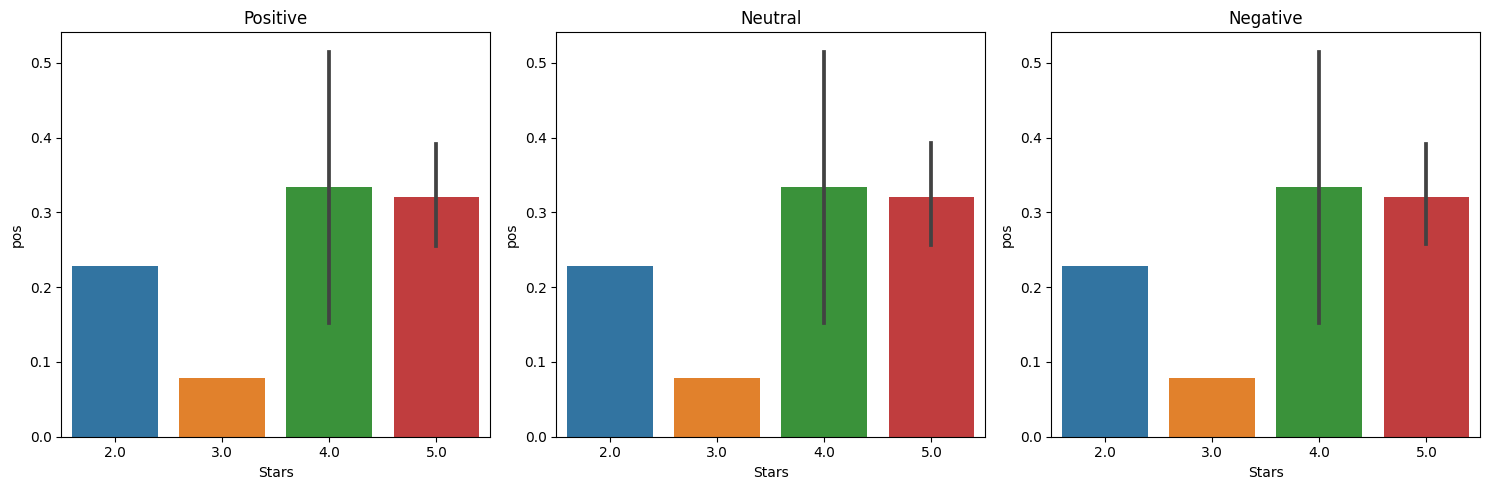

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[1])
sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
#download weights for pretrained Roberta Model

MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(ex)
sia.polarity_scores(ex)

Took a pic on the side of my 55" tv for size reference.  Been waiting since og launch for the slim release since typically slim releases have all the og bugs worked out as well as saving a lil bit of space.Spiderman code worked.No probs with set up.  I like how it gives you qr codes to make the set up with existing ps accnt easier.Downloaded a few games and apps smoothly.So far so good!  I like the new HUB vs the ps4 set up too.No regrets here!


{'neg': 0.027, 'neu': 0.849, 'pos': 0.124, 'compound': 0.837}

In [ ]:
encoded_text = tokenizer(ex, return_tensors='pt')
print(encoded_text)

{'input_ids': tensor([[    0,   565,  6576,    10,  1893,    15,     5,   526,     9,   127,
          3490,   113, 30016,    13,  1836,  5135,     4,  1437, 30857,  2445,
           187,  1021,   571,  1709,    13,     5, 11875,   800,   187,  3700,
         11875,  8255,    33,    70,     5,  1021,   571, 19230,  1006,    66,
            25,   157,    25,  6549,    10, 38101,   828,     9,   980,     4,
         41624,   397,  3260,  1006,     4,  3084,  1759,  4311,    19,   278,
            62,     4,  1437,    38,   101,   141,    24,  2029,    47,  2231,
           338, 14284,     7,   146,     5,   278,    62,    19,  2210, 27778,
          7678,  3999,  3013,     4, 44514,   196,    10,   367,   426,     8,
          3798, 17359,     4,  2847,   444,    98,   205,   328,  1437,    38,
           101,     5,    92,   289, 12027,  1954,     5, 27778,   306,   278,
            62,   350,     4,  3084, 19078,   259,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'r_neg': scores[0],
    'r_neu': scores[1],
    'r_pos': scores[2]
}

print(scores_dict)

{'r_neg': 0.0046368847, 'r_neu': 0.023539243, 'r_pos': 0.9718239}


In [ ]:
def polarity_scores_roberta(ex):
  encoded_text = tokenizer(ex, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'r_neg': scores[0],
      'r_neu': scores[1],
      'r_pos': scores[2]
  }
  return scores_dict

In [ ]:
res = {}
for i, row in tqdm(ps.iterrows(), total=len(ps)):
  try:
    text = row['Reviews']
    stars = row['Stars']
    id = row['ID']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}

    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)

    both = {**vader_result_rename, **roberta_result}
    res[id] = both

  except RuntimeError:
    print(f'Broke for id {id}')

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
res

{1: {'vader_neg': 0.0,
  'vader_neu': 0.801,
  'vader_pos': 0.199,
  'vader_compound': 0.9853,
  'r_neg': 0.0073414254,
  'r_neu': 0.053010404,
  'r_pos': 0.9396482},
 2: {'vader_neg': 0.027,
  'vader_neu': 0.849,
  'vader_pos': 0.124,
  'vader_compound': 0.837,
  'r_neg': 0.0046368847,
  'r_neu': 0.023539243,
  'r_pos': 0.9718239},
 3: {'vader_neg': 0.0,
  'vader_neu': 0.894,
  'vader_pos': 0.106,
  'vader_compound': 0.8266,
  'r_neg': 0.006855508,
  'r_neu': 0.04677482,
  'r_pos': 0.94636965},
 4: {'vader_neg': 0.09,
  'vader_neu': 0.758,
  'vader_pos': 0.152,
  'vader_compound': 0.296,
  'r_neg': 0.25013041,
  'r_neu': 0.54198307,
  'r_pos': 0.20788647},
 5: {'vader_neg': 0.084,
  'vader_neu': 0.573,
  'vader_pos': 0.343,
  'vader_compound': 0.9236,
  'r_neg': 0.010730401,
  'r_neu': 0.026395733,
  'r_pos': 0.9628739},
 6: {'vader_neg': 0.0,
  'vader_neu': 0.485,
  'vader_pos': 0.515,
  'vader_compound': 0.8588,
  'r_neg': 0.0014958001,
  'r_neu': 0.00952327,
  'r_pos': 0.9889809},


In [ ]:
ps5 = pd.DataFrame(res).T
ps5 = ps5.reset_index().rename(columns={'index':'ID'})
ps5 = ps5.merge(ps, how='left')

In [ ]:
ps5.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,r_neg,r_neu,r_pos,Reviews,Stars
0,1,0.000,0.801,0.199,0.9853,0.007341,0.053010,0.939648,I ordered this the day it released on Friday N...,5.0
1,2,0.027,0.849,0.124,0.8370,0.004637,0.023539,0.971824,"Took a pic on the side of my 55"" tv for size r...",5.0
2,3,0.000,0.894,0.106,0.8266,0.006856,0.046775,0.946370,I've waited 3 years for Spider-Man 2 game bund...,5.0
3,4,0.090,0.758,0.152,0.2960,0.250130,0.541983,0.207886,Open the box to find my ps5 that i paid 499 fo...,4.0
4,5,0.084,0.573,0.343,0.9236,0.010730,0.026396,0.962874,It was amazing. I was worried about my package...,5.0


In [ ]:
ps5.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'r_neg',
       'r_neu', 'r_pos', 'Reviews', 'Stars'],
      dtype='object')

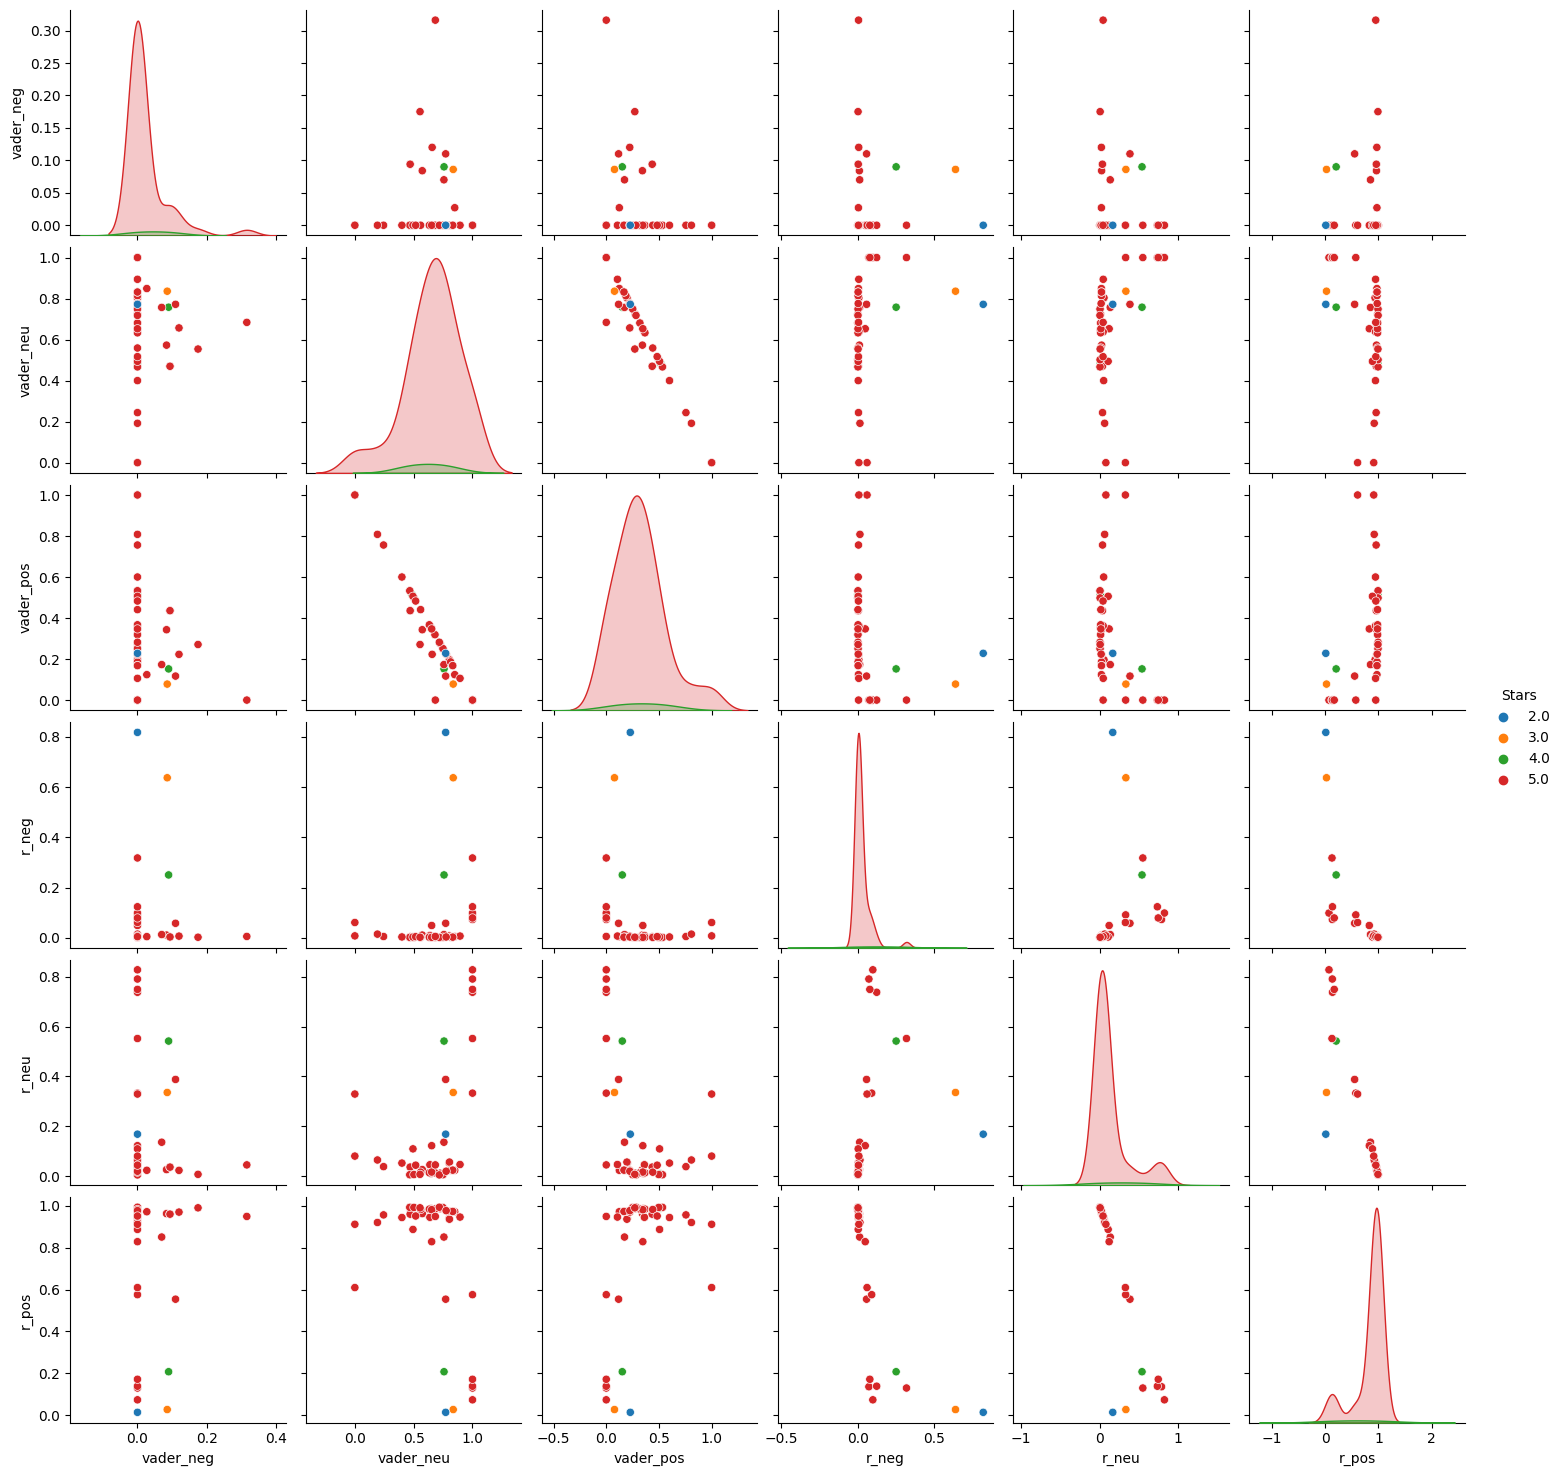

In [ ]:
#compare results using models
sns.pairplot(data=ps5, vars=['vader_neg', 'vader_neu', 'vader_pos', 'r_neg', 'r_neu', 'r_pos'], hue='Stars', palette='tab10')
plt.show()

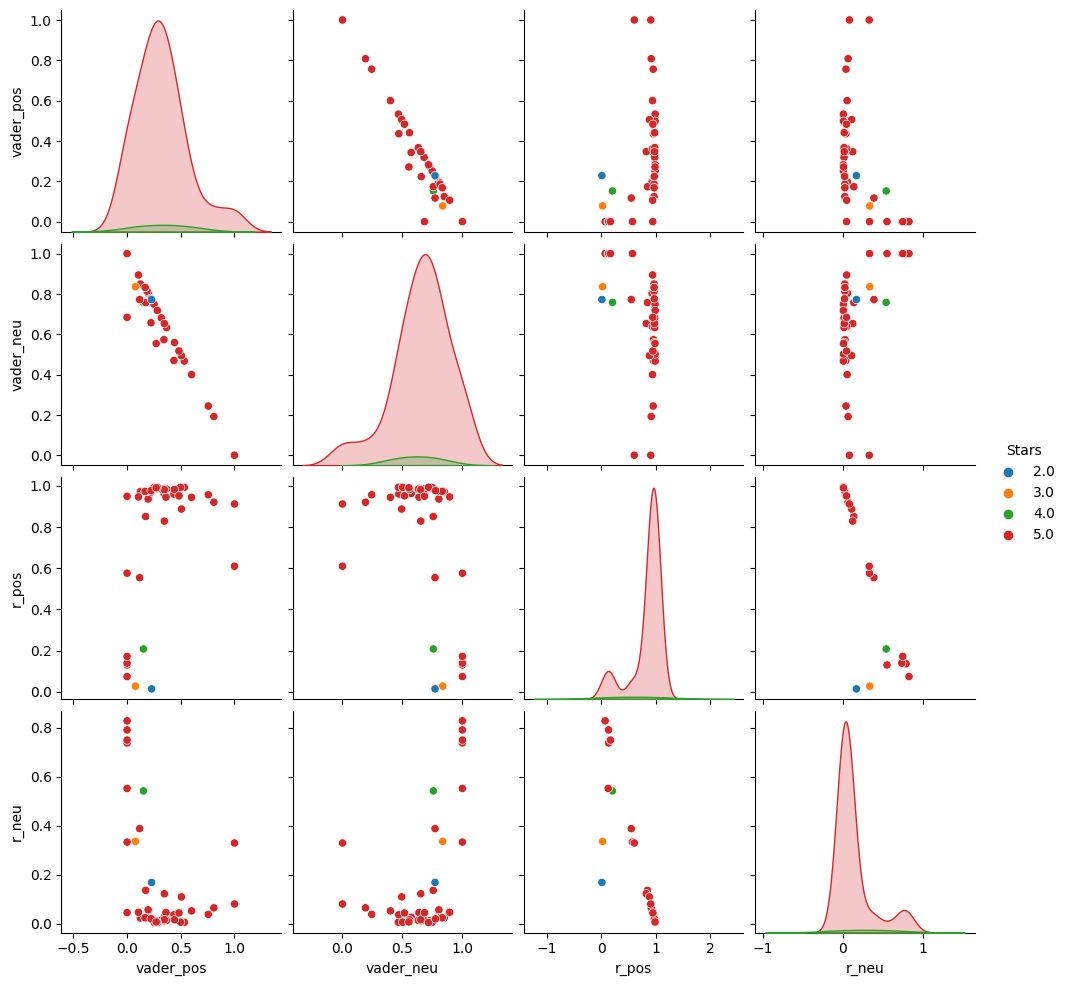

In [ ]:
#compare results using models
sns.pairplot(data=ps5, vars=['vader_pos', 'vader_neu', 'r_pos', 'r_neu'], hue='Stars', palette='tab10')
plt.show()